# Welcome to Reece Boyce's Jupyter Notebook: 

#### This Code is housing my portion of analysis and coding for our final Capstone project!

###### Importing processes, and loading data!

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [91]:
df = pd.read_csv('Files/bom.movie_gross.csv.gz')

###### Getting an Idea of the data we are working with.

In [92]:
#Filtering info to get an idea of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [93]:
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [157]:
df.isnull().sum()
# df.sort_values(by='domestic_gross', ascending=False)

title                0
studio               0
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [111]:
#Null Studio Movies

df['studio'].fillna(value='Unknown', inplace=True)

In [113]:
df.isnull().sum()

title                0
studio               0
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [130]:
df[df['domestic_gross'].isnull()].head()

,title,studio,domestic_gross,foreign_gross,year
230,It's a Wonderful Afterlife,UTV,NaN,1300000,2010
298,Celine: Through the Eyes of the World,Sony,NaN,119000,2010
302,White Lion,Scre.,NaN,99600,2010
306,Badmaash Company,Yash,NaN,64400,2010
327,Aashayein (Wishes),Relbig.,NaN,3800,2010


###### Some movies dont air domestically and vica versa! Hence we can clean and plot the seperately.

In [198]:
domestic_movie_gross = df.dropna(subset=['domestic_gross'])

In [212]:
top_10_domestic = domestic_movie_gross['domestic_gross'].sort_values(ascending=False)


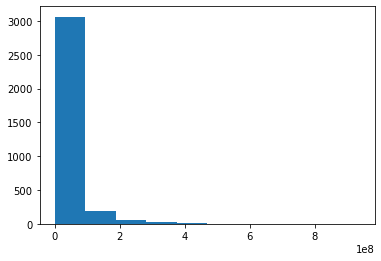

In [215]:
x = top_10_domestic

plt.hist(x, bins =10 )
plt.show()